# Game Analysis

Sometimes, in a typical game of battles 2, two opposing players may take two different approaches to generating income potentially guided by different philosophies concerning what flowchart works better. When it is not obvious which one really is better, we can turn to the simulator help guide us in this approach. The simulator is robust enough that we can capture the finer intricacies of the flowcharts to comapre, thus minimizing or even entirely removing the need to consider simulator shortcomings when making important strategy decisions in game. In this module, we analyze a match between ninjayas and esport on Bot Factory where both players take different approaches to boat farming. Once again, don't forget to `import b2sim as b2`!

In [1]:
import b2sim as b2
from copy import deepcopy as dc

## The esport flowchart

In the esport flowchart, esport eco's reds on R3 (rather than blues) and stops eco on R4 (if necessary) so that he can get an early R4 merchant. He then proceeds to follow the standard "eco" flowchart...

Warning! The eco send Spaced Whites is not available yet! Switching to the zero send for now, we will attempt to use this send later.


,Time,Type,Message
0,0.0,Eco,Change eco to Zero
1,6.0,Round,Round 1.0 start
2,6.0,Eco,Change eco to Grouped Reds
3,18.0,Buy,buy mortar
4,18.1,Eco,Change eco to Spaced Blues
5,24.4,Eco,Change eco to Grouped Reds
6,30.0,Buy,buy jericho
7,34.0,Round,Round 2.0 start
8,61.5,Round,Round 3.0 start
9,91.0,Round,Round 4.0 start


The current cash and eco are (4942.800000000031,853.2000000000052)


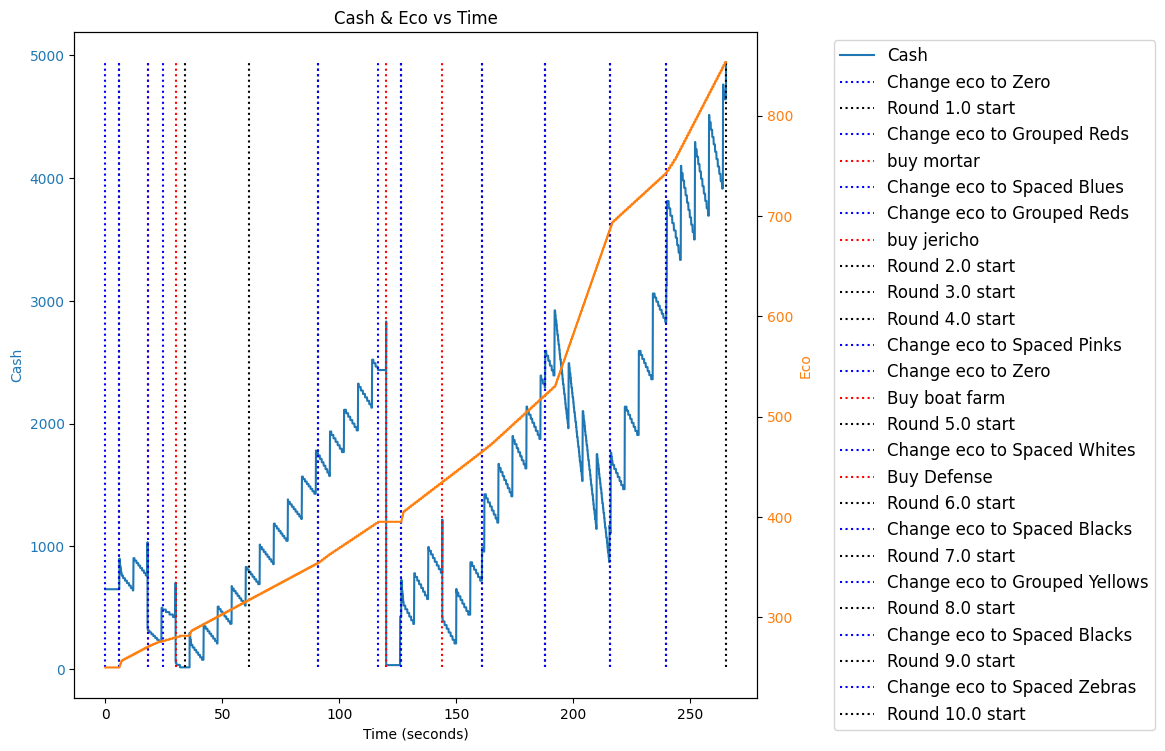

In [6]:
rounds = b2.Rounds([(0,1.0),(6,0.5)])

buy_queue = [
    #Buy a 000 mortar
    [b2.buyDefense(700, buffer = 240, message="buy mortar")],
    
    #Buy Jericho
    [b2.buyDefense(650, message="buy jericho")],

    #Buy Boat Farm
    [b2.buyBoatFarm()],

    #Buy a 022 mortar
    [b2.buyDefense(800, buffer = 240)]

]

eco_queue = [
    b2.ecoSend(time = rounds.getTimeFromRound(1), send_name = 'Grouped Reds', max_eco_amount=271),
    b2.ecoSend(send_name = 'Spaced Blues', property = 'Normal', max_eco_amount=276),
    b2.ecoSend(time = rounds.getTimeFromRound(2), send_name = 'Grouped Reds'),
    b2.ecoSend(time = rounds.getTimeFromRound(4), send_name = 'Spaced Pinks', max_eco_amount = 395),
    b2.ecoSend(time = rounds.getTimeFromRound(5), send_name = 'Spaced Whites'),
    b2.ecoSend(time = rounds.getTimeFromRound(6), send_name = 'Spaced Blacks'),
    b2.ecoSend(time = rounds.getTimeFromRound(7), send_name = 'Grouped Yellows'),
    b2.ecoSend(time = rounds.getTimeFromRound(8), send_name = 'Spaced Blacks'),
    b2.ecoSend(time = rounds.getTimeFromRound(9), send_name = 'Spaced Zebras')
]

initial_state_game = {
    'Cash': 650,
    'Eco': 250,
    'Eco Send': b2.ecoSend(send_name='Zero'),
    'Rounds': rounds,
    'Game Round': 0,
    'Buy Queue': buy_queue,
    'Eco Queue': eco_queue
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 10)
game_state.viewCashEcoHistory(dim=(12,8))
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'esport_bfac')

## The ninjayas flowchart

Ninjayas follows a more "traditional" early merchantman flowchart, following the standard eco flowchart until R5, where he switches to spaced whites and stops eco (if necessary) to gain a R5 merchant. After this, his eco flowchart matches esport's identically.

Warning! The eco send Spaced Blacks is not available yet! Switching to the zero send for now, we will attempt to use this send later.


,Time,Type,Message
0,0.0,Eco,Change eco to Zero
1,6.0,Round,Round 1.0 start
2,6.0,Eco,Change eco to Grouped Reds
3,18.0,Buy,buy mortar
4,18.1,Eco,Change eco to Spaced Blues
5,24.4,Eco,Change eco to Grouped Reds
6,30.0,Buy,buy jericho
7,34.0,Round,Round 2.0 start
8,61.5,Round,Round 3.0 start
9,61.5,Eco,Change eco to Grouped Blues


The current cash and eco are (4628.900000000027,871.600000000005)


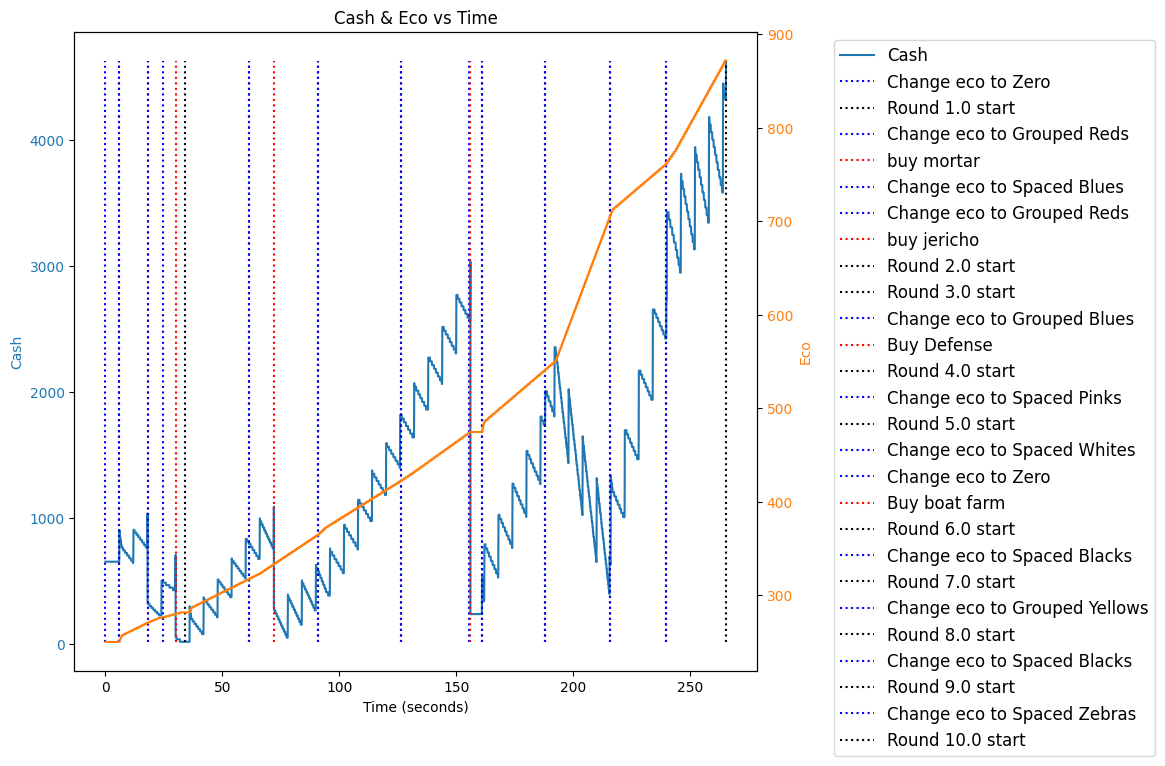

In [5]:
rounds = b2.Rounds([(0,1.0),(6,0.5)])

buy_queue = [
    #Buy a 000 mortar
    [b2.buyDefense(700, buffer = 240, message="buy mortar")],
    
    #Buy Jericho
    [b2.buyDefense(650,message="buy jericho")],

    #Upgrade to 022 mortar
    [b2.buyDefense(800, buffer = 240)],
    
    #Buy Boat Farm
    [b2.buyBoatFarm()]
]

eco_queue = [
    b2.ecoSend(time = rounds.getTimeFromRound(1), send_name = 'Grouped Reds', max_eco_amount=271),
    b2.ecoSend(send_name = 'Spaced Blues', property = 'Normal', max_eco_amount=276),
    b2.ecoSend(time = rounds.getTimeFromRound(2), send_name = 'Grouped Reds'),
    b2.ecoSend(time = rounds.getTimeFromRound(3), send_name = 'Grouped Blues'),
    b2.ecoSend(time = rounds.getTimeFromRound(4), send_name = 'Spaced Pinks'),
    b2.ecoSend(time = rounds.getTimeFromRound(5), send_name = 'Spaced Whites', max_eco_amount=473),
    b2.ecoSend(time = rounds.getTimeFromRound(6), send_name = 'Spaced Blacks'),
    b2.ecoSend(time = rounds.getTimeFromRound(7), send_name = 'Grouped Yellows'),
    b2.ecoSend(time = rounds.getTimeFromRound(8), send_name = 'Spaced Blacks'),
    b2.ecoSend(time = rounds.getTimeFromRound(9), send_name = 'Spaced Zebras')
]

initial_state_game = {
    'Cash': 650,
    'Eco': 250,
    'Eco Send': b2.ecoSend(send_name='Zero'),
    'Rounds': rounds,
    'Game Round': 0,
    'Buy Queue': buy_queue,
    'Eco Queue': eco_queue
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 10)
game_state.viewCashEcoHistory(dim=(12,8))
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'ninjayas_bfac')